In [178]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [179]:
df1 = pd.read_csv(r'C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\sentiment_score\sentiment_scoring_result1_prompt_ver1.csv', engine='python')
df2 = pd.read_csv(r'C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\sentiment_score\result2_10300.csv', engine='python')
df3 = pd.read_csv(r'C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\sentiment_score\result2_22208.csv', engine='python')
df4 = pd.read_csv(r'C:\Users\boyu571\boyu571_Github\01_Kakaobank_SKKU_Research_23\data\sentiment_score\sentiment_scoring_result3_prompt_ver1.csv', engine='python')

In [180]:
# 각 DataFrame에서 첫 번째 열을 삭제
df1 = df1.drop(df1.columns[0], axis=1)
df2 = df2.drop(df2.columns[0], axis=1)
df3 = df3.drop(df3.columns[0], axis=1)
df4 = df4.drop(df4.columns[0], axis=1)

# 각 DataFrame에서 모든 열이 비어있는 행만 삭제
df1 = df1.dropna(how='all')
df3 = df3.dropna(how='all')
df3 = df3.dropna(how='all')
df4 = df4.dropna(how='all')

In [190]:
# import pandas as pd

# def combine_rows(df):
#     combined_rows = []  # 조합된 행을 저장할 리스트
#     temp_row = []  # 임시로 연속된 행들을 저장할 리스트
    
#     for index, row in df.iterrows():
#         # 비어있는 열의 수를 계산
#         empty_cols_count = row.isna().sum()
        
#         # 비어있는 열이 없는 경우
#         if empty_cols_count == 0:
#             if temp_row:  # temp_row가 비어있지 않은 경우
#                 combined = pd.concat(temp_row, ignore_index=True)
#                 # 결합된 행의 열의 개수가 df의 열의 개수보다 많은 경우
#                 while len(combined) > len(df.columns):
#                     # 4, 5 번째 열의 내용을 문자열 결합하여 하나의 열로 합침
#                     combined.iloc[3] = str(combined.iloc[3]) + " " + str(combined.iloc[4])
#                     combined = combined.drop(combined.index[4]).reset_index(drop=True)
#                 combined_rows.append(combined)
#                 temp_row.clear()
#             combined_rows.append(row)
#         else:  # 비어있는 열이 있는 경우
#             temp_row.append(row.dropna())
    
#     # 마지막 연속된 행들을 처리
#     if temp_row:
#         combined = pd.concat(temp_row, ignore_index=True)
#         # 결합된 행의 열의 개수가 df의 열의 개수보다 많은 경우
#         while len(combined) > len(df.columns):
#             # 4, 5 번째 열의 내용을 문자열 결합하여 하나의 열로 합침
#             combined.iloc[3] = str(combined.iloc[3]) + " " + str(combined.iloc[4])
#             combined = combined.drop(combined.index[4]).reset_index(drop=True)
#         combined_rows.append(combined)
    
#     # DataFrame으로 변환하고 원래의 컬럼 순서를 유지
#     combined_df = pd.DataFrame(combined_rows, columns=df.columns)
#     return combined_df

In [195]:
def combine_rows(df):
    combined_rows = []  # 조합된 행을 저장할 리스트
    temp_row = []  # 임시로 연속된 행들을 저장할 리스트
    for index, row in df.iterrows():
        # 비어있는 열의 수를 계산
        empty_cols_count = row.isna().sum()
        
        # 비어있는 열이 없는 경우
        if empty_cols_count == 0:
            if temp_row:  # temp_row가 비어있지 않은 경우
                combined_rows.append(pd.concat(temp_row, ignore_index=True))
                temp_row.clear()
            combined_rows.append(row)
        else:  # 비어있는 열이 있는 경우
            temp_row.append(row.dropna())
    
    # 마지막 연속된 행들을 처리
    if temp_row:
        combined_rows.append(pd.concat(temp_row, ignore_index=True))
    
    # DataFrame으로 변환하고 원래의 컬럼 순서를 유지
    combined_df = pd.DataFrame(combined_rows, columns=df.columns)
    return combined_df

In [163]:
# # 조합된 행들로 구성된 DataFrame을 얻음
# df2_combined = combine_rows(df2)
# df2_combined = df2_combined.dropna(how='all')
# df2_combined

,UTC-date,UTC-time,title,content,press,link,score_title
0,2016-12-31,2016-12-31 22:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세계는 핀테크 혁명 ...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,0
1,2017-01-01,2017-01-01 06:15:04,"英 파운드, 2016년 최악의 통화 ···'디지털통화' 비트코인 최고의 수익자산...",【뉴욕=정지원 특파원】 영국의 파운드가 2106년 최악의 통화로 기록됐다. 파운드는...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,0.5
2,2017-01-01,2017-01-01 07:03:04,"[신년기획]블록체인, 금융권 넘어 IT기업도 관심",“블록체인은 인터넷 이후 나온 가장 혁신적이며 파괴적인 기술이다.”블록체인을 바라보...,39면 1단,https://n.news.naver.com/mnews/article/030/000...,0
3,2017-01-02,2017-01-02 09:47:22,공공기관·기업 대상으로 랜섬웨어 다량 유포…관계자 주의 필요,[아시아경제 박소연 기자]이스트소프트는 2일 국내 주요 국가 기관과 기업을 대상으로...,아시아경제,https://n.news.naver.com/mnews/article/277/000...,-1
4,2017-01-02,2017-01-02 08:04:01,블록체인 등 최신 핀테크 기술 도입… `금융 한류` 일으키자,올 세계 은행 80% '블록체인' 도입 전망금융회사 거래 비용 약 30% 절감 예측...,4면 TOP,https://n.news.naver.com/mnews/article/029/000...,0
...,...,...,...,...,...,...,...
10499,2021-01-02,2021-01-02 23:44:42,"""금·은 추가 상승여력 충분""",[파이낸셜뉴스] 2019년 7월 5일(현지시간) 스위스 노이카텔에서 촬영된 ...,파이낸셜뉴스언론사 선정,https://n.news.naver.com/mnews/article/014/000...,0
10500,2021-01-02,2021-01-02 14:53:57,"[속보] 2일 비트코인 3만달러 돌파 ""사상 최고가""",매일신문 속보 이미지. 매일신문DB2일(현지시간) 가상화폐(암호화폐_ 비트코인 가격...,매일신문언론사 선정,https://n.news.naver.com/mnews/article/088/000...,1
10501,2021-01-03,2021-01-03 07:18:17,[포토] 비트코인 가격 3천500만원 넘어서며 사상 최고가 기록,가상화폐 비트코인의 가격이 상승하며 2일(현지시간) 사상 최고가인 3만3천달러(약...,매일경제,https://n.news.naver.com/mnews/article/009/000...,1
10502,2021-01-03,2021-01-03 07:03:46,`디지털 엘도라도를 찾아서` 비트코인 3만달러 돌파…개미들 채굴업체 주식 매...,비트디지털·마라톤·라이엇 등투자자들 채굴업체 주식 매수올해 비트코인 ETF 첫 출시...,매일경제,https://n.news.naver.com/mnews/article/009/000...,0


In [196]:
# 조합된 행들로 구성된 DataFrame을 얻음
df1_combined = combine_rows(df1)
df1_combined = df1_combined.dropna(how='all')

# 조합된 행들로 구성된 DataFrame을 얻음
df2_combined = combine_rows(df2)
df2_combined = df2_combined.dropna(how='all')

# 조합된 행들로 구성된 DataFrame을 얻음
df3_combined = combine_rows(df3)
df3_combined = df3_combined.dropna(how='all')

# 조합된 행들로 구성된 DataFrame을 얻음
df4_combined = combine_rows(df4)
df4_combined = df4_combined.dropna(how='all')

In [198]:
# Find the indices of rows in df2_combined that have any missing values
rows_with_missing_values = df3_combined[df3_combined.isnull().any(axis=1)].index.tolist()
rows_with_missing_values

[]

In [199]:
df_full = df1_combined
df_title = pd.concat([df2_combined, df3_combined])
df_content = df4_combined
print(len(df_full))
print(len(df_title))
print(len(df_content))

22081
22081
22081


In [203]:
def process_score_title(input_df):
    df = input_df.copy()  # 입력 DataFrame 복사하여 새로운 DataFrame 생성

    # 'score_title' 열을 float으로 변환하여 'score_title2' 열에 추가
    def convert_to_float(value):
        try:
            return float(value)
        except ValueError:
            return None

    df['score_title2'] = df['score_title'].apply(convert_to_float)

    # score_title2 열이 비어있는 행을 처리하여 값을 추출하여 채우기
    def fill_empty_score_title2(row):
        if pd.isna(row['score_title2']):
            numeric_values = re.findall(r'[-+]?\d*\.\d+|\d+', str(row['score_title']))
            if numeric_values:
                numeric_value = float(numeric_values[0])
                if -1 <= numeric_value <= 1:
                    return numeric_value
        return row['score_title2']

    df['score_title2'] = df.apply(fill_empty_score_title2, axis=1)
    
    return df

In [ ]:

# 함수를 호출하여 결과 확인
processed_df = process_score_title(df_title)
processed_df

In [200]:
# 'score_title' 열을 float으로 변환하여 'score_title2' 열에 추가
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None

df_title['score_title2'] = df_title['score_title'].apply(convert_to_float)


In [168]:
# score_title2 열이 비어있는 행을 처리하여 값을 추출하여 채우기
def fill_empty_score_title2(row):
    if pd.isna(row['score_title2']):
        numeric_values = re.findall(r'[-+]?\d*\.\d+|\d+', str(row['score_title']))
        if numeric_values:
            numeric_value = float(numeric_values[0])
            if -1 <= numeric_value <= 1:
                return numeric_value
    return row['score_title2']

df_title['score_title2'] = df_title.apply(fill_empty_score_title2, axis=1)

# 결과 확인
df_title

,UTC-date,UTC-time,title,content,press,link,score_title,score_title2
0,2016-12-31,2016-12-31 22:00:00,한국 금융산업 위기… ‘우버 모멘트’ 를 넘어라,© News1저금리·저성장 전통 금융산업 위기4차 산업혁명...세계는 핀테크 혁명 ...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,0,0.0
1,2017-01-01,2017-01-01 06:15:04,"英 파운드, 2016년 최악의 통화 ···'디지털통화' 비트코인 최고의 수익자산...",【뉴욕=정지원 특파원】 영국의 파운드가 2106년 최악의 통화로 기록됐다. 파운드는...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,0.5,0.5
2,2017-01-01,2017-01-01 07:03:04,"[신년기획]블록체인, 금융권 넘어 IT기업도 관심",“블록체인은 인터넷 이후 나온 가장 혁신적이며 파괴적인 기술이다.”블록체인을 바라보...,39면 1단,https://n.news.naver.com/mnews/article/030/000...,0,0.0
3,2017-01-02,2017-01-02 09:47:22,공공기관·기업 대상으로 랜섬웨어 다량 유포…관계자 주의 필요,[아시아경제 박소연 기자]이스트소프트는 2일 국내 주요 국가 기관과 기업을 대상으로...,아시아경제,https://n.news.naver.com/mnews/article/277/000...,-1,-1.0
4,2017-01-02,2017-01-02 08:04:01,블록체인 등 최신 핀테크 기술 도입… `금융 한류` 일으키자,올 세계 은행 80% '블록체인' 도입 전망금융회사 거래 비용 약 30% 절감 예측...,4면 TOP,https://n.news.naver.com/mnews/article/029/000...,0,0.0
...,...,...,...,...,...,...,...,...
10499,2021-01-02,2021-01-02 23:44:42,"""금·은 추가 상승여력 충분""",[파이낸셜뉴스] 2019년 7월 5일(현지시간) 스위스 노이카텔에서 촬영된 ...,파이낸셜뉴스언론사 선정,https://n.news.naver.com/mnews/article/014/000...,0,0.0
10500,2021-01-02,2021-01-02 14:53:57,"[속보] 2일 비트코인 3만달러 돌파 ""사상 최고가""",매일신문 속보 이미지. 매일신문DB2일(현지시간) 가상화폐(암호화폐_ 비트코인 가격...,매일신문언론사 선정,https://n.news.naver.com/mnews/article/088/000...,1,1.0
10501,2021-01-03,2021-01-03 07:18:17,[포토] 비트코인 가격 3천500만원 넘어서며 사상 최고가 기록,가상화폐 비트코인의 가격이 상승하며 2일(현지시간) 사상 최고가인 3만3천달러(약...,매일경제,https://n.news.naver.com/mnews/article/009/000...,1,1.0
10502,2021-01-03,2021-01-03 07:03:46,`디지털 엘도라도를 찾아서` 비트코인 3만달러 돌파…개미들 채굴업체 주식 매...,비트디지털·마라톤·라이엇 등투자자들 채굴업체 주식 매수올해 비트코인 ETF 첫 출시...,매일경제,https://n.news.naver.com/mnews/article/009/000...,0,0.0


In [169]:
df_title['score_title2'].value_counts()

 0.00    6465
 0.50    1378
-1.00    1149
 1.00    1070
 0.20      94
 0.80      32
 0.10      18
 0.90       4
 0.18       2
-0.50       1
 0.24       1
-0.29       1
 0.17       1
 0.33       1
 0.28       1
 0.29       1
 0.84       1
 0.77       1
 0.52       1
Name: score_title2, dtype: int64

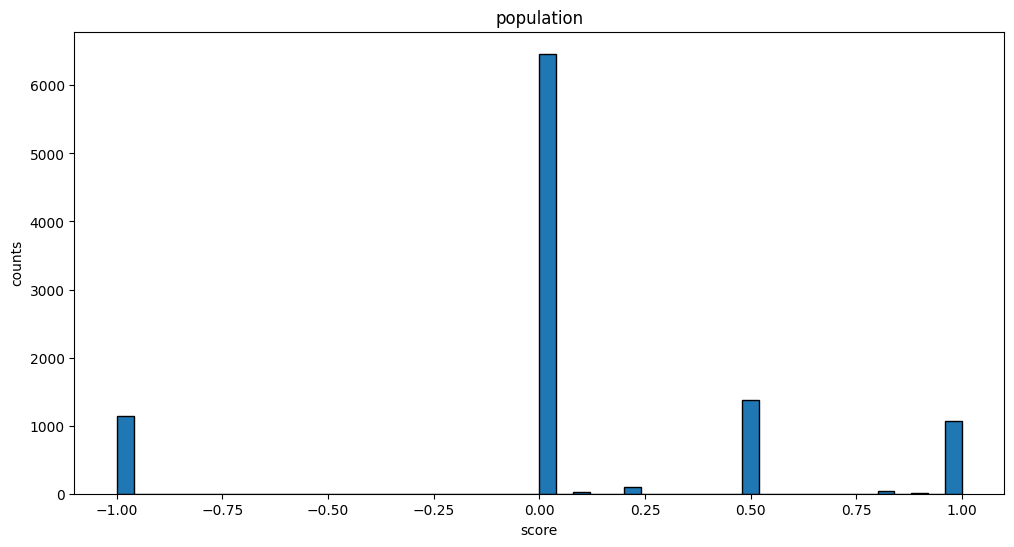

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# 'score_title' 열에서 숫자 값을 필터링하여 추출
numeric_values = df_title['score_title2'].apply(lambda x: re.findall(r'[-+]?\d*\.\d+|\d+', str(x)))
numeric_values = numeric_values.explode().astype(float)

# -1부터 1까지의 범위 내의 값만 추출
numeric_values_filtered = numeric_values[(numeric_values >= -1) & (numeric_values <= 1)]

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 숫자 값의 분포를 히스토그램으로 그리기 (더 세분화된 x 축)
plt.hist(numeric_values_filtered, bins=50, edgecolor='k', range=(-1, 1))

# 그래프 제목과 축 레이블 설정
plt.title('population')
plt.xlabel('score')
plt.ylabel('counts')

# 그래프 표시
plt.show()

In [177]:
len(df_content['score_content'].unique())

55

In [134]:
# 'score_title' 열의 값을 수치형으로 변환 (예: float)
df_title['score_title'] = df_title['score_title'].astype(float)


ValueError: could not convert string to float: '컨퍼런스 개최 예정\n\n0'

In [132]:
grouped_df = df_title.groupby('UTC-date')['score_title'].mean().reset_index()
grouped_df

TypeError: Could not convert 000-11 to numeric

In [ ]:
grouped_df = data.groupby('UTC-date')['score_content'].mean().reset_index()
grouped_df = grouped_df.rename(columns={'UTC-date': 'date'})
grouped_df['lagged_score_1'] = grouped_df['score_content'].shift(1)
grouped_df['lagged_score_2'] = grouped_df['score_content'].shift(2)
grouped_df['lagged_score_3'] = grouped_df['score_content'].shift(3)
grouped_df

In [173]:
df_title['score_title'] = pd.to_numeric(df_title['score_title'], errors='coerce')
df_full['score'] = pd.to_numeric(df_full['score'], errors='coerce')
df_content['score_content'] = pd.to_numeric(df_content['score_content'], errors='coerce')

In [175]:
score_stats = df_full['score'].describe()
score_title_stats = df_title['score_title'].describe()
score_content_stats = df_content['score_content'].describe()

In [176]:
comparison_df = pd.concat([score_stats, score_title_stats, score_content_stats], axis=1, keys=['score', 'score_title', 'score_content'])
print(comparison_df)

              score   score_title  score_content
count  22064.000000  10221.000000    22034.00000
mean      10.068510      0.064848       17.78562
std      315.584165      0.499560      420.30421
min       -1.000000     -1.000000       -1.00000
25%        0.000000      0.000000        0.00000
50%        0.000000      0.000000        0.00000
75%        0.000000      0.200000        0.00000
max     9999.000000      1.000000     9999.00000
